In [2]:
!git clone https://github.com/creatorcao/StyleEmbryo.git

Cloning into 'StyleEmbryo'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 318 (delta 16), reused 0 (delta 0), pack-reused 263
Receiving objects: 100% (318/318), 6.40 MiB | 23.14 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [3]:
cd StyleEmbryo

/content/StyleEmbryo


### Metrics analysis

In [4]:
import pandas as pd
from scipy.stats import kruskal

data = pd.read_csv('./results/VTT.csv',
                   sep=',')

df = pd.melt(data,
             id_vars=["group", "experience", "1-specificity"],
             value_vars=["accuracy", "sensitivity", "specificity"],
             var_name="Metric", value_name="Value")

group_metrics = df.groupby(
    ['group', 'Metric'])['Value'].agg([pd.Series.mean, pd.Series.std])

for group in df['group'].unique():
    for metric in df['Metric'].unique():
        mean_val = group_metrics.loc[(group, metric), 'mean']
        std_val = group_metrics.loc[(group, metric), 'std']
        print(f'{group} {metric} mean: {mean_val}')
        print(f'{group} {metric} std: {std_val}')
        print()

print("-"*50)

group1_data = df[df['group'] == 'Embryologist']
group2_data = df[df['group'] == 'IVF lab technician']
group3_data = df[df['group'] == 'Lay person']

for metric in df['Metric'].unique():
    group1_metric = group1_data[group1_data['Metric'] == metric]['Value']
    group2_metric = group2_data[group2_data['Metric'] == metric]['Value']
    group3_metric = group3_data[group3_data['Metric'] == metric]['Value']

    _, p_value = kruskal(group1_metric, group2_metric, group3_metric)

    print(f'Kruskal-Wallis test for {metric}:')
    print(f'P-value: {p_value}')

    if p_value < 0.05:
        print(f'***Statistically significant differences exist for {metric}.\n')
    else:
        print(f'No statistically significant differences for {metric}.\n')


Embryologist accuracy mean: 55.68
Embryologist accuracy std: 6.223075338340896

Embryologist sensitivity mean: 65.88799999999999
Embryologist sensitivity std: 14.059170198367564

Embryologist specificity mean: 45.052
Embryologist specificity std: 17.760023460945465

IVF lab technician accuracy mean: 54.2
IVF lab technician accuracy std: 4.678216998570533

IVF lab technician sensitivity mean: 65.88
IVF lab technician sensitivity std: 17.616923681505803

IVF lab technician specificity mean: 42.03333333333333
IVF lab technician specificity std: 19.591932256002966

Lay person accuracy mean: 50.1
Lay person accuracy std: 3.8099592482970484

Lay person sensitivity mean: 49.32
Lay person sensitivity std: 10.781250781845893

Lay person specificity mean: 50.915
Lay person specificity std: 10.354519735234872

--------------------------------------------------
Kruskal-Wallis test for accuracy:
P-value: 0.0011847921860163517
***Statistically significant differences exist for accuracy.

Kruskal-Wal

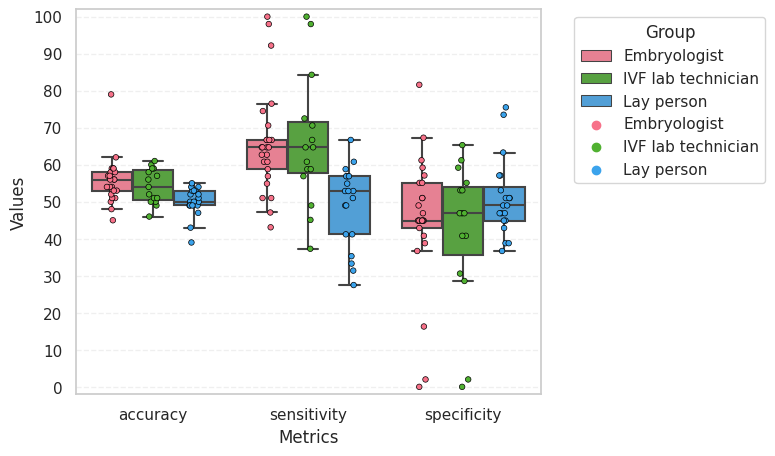

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")

custom_palette = sns.color_palette("husl", n_colors=3)

ax = sns.boxplot(
    data=df, x="Metric", y="Value", hue="group",
    palette=custom_palette,  linewidth=1.5, showfliers=False,
    zorder=1,
)

sns.stripplot(data=df, x="Metric", y="Value", hue="group",
              dodge=True, jitter=True,
              size = 4, alpha=1,
              palette=custom_palette,
              zorder=2, linewidth=0.5, edgecolor='black')

plt.ylim(-2, 102)
plt.yticks(range(0, 102, 10))
plt.grid(axis="y", linestyle="--", alpha=0.3, zorder=0)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.legend(title="Group", loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show();


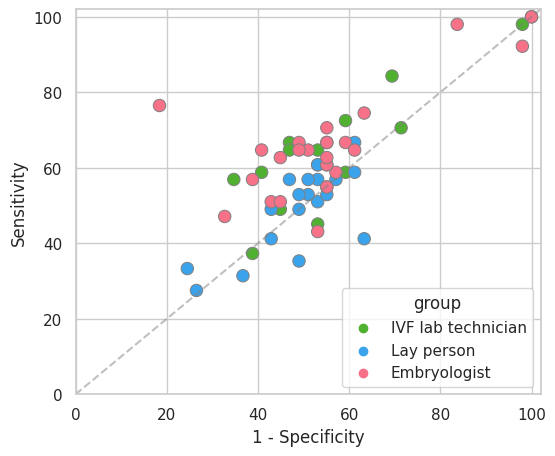

In [6]:

custom_shapes = ["o", "o", "o"]
custom_colors = sns.color_palette("husl", n_colors=3)

plt.figure(figsize=(6,5))
sns.scatterplot(data=data[data['group'].isin(['IVF lab technician',
                                              'Lay person'])],
                y='sensitivity',
                x='1-specificity',
                hue='group',
                style='group',
                palette=custom_colors[1:],
                markers=custom_shapes[1:],
                s=80, edgecolor='gray')

sns.scatterplot(data=data[data['group'] == 'Embryologist'],
                y='sensitivity',
                x='1-specificity',
                hue='group',
                style='group',
                palette=custom_colors[0:1],
                markers=custom_shapes[0:1],
                s=80, edgecolor='gray')

plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.plot([0, 102], [0, 102],
         linestyle='--', color='gray', alpha=0.5)
plt.xlim(0, 102)
plt.ylim(0, 102)
plt.show();


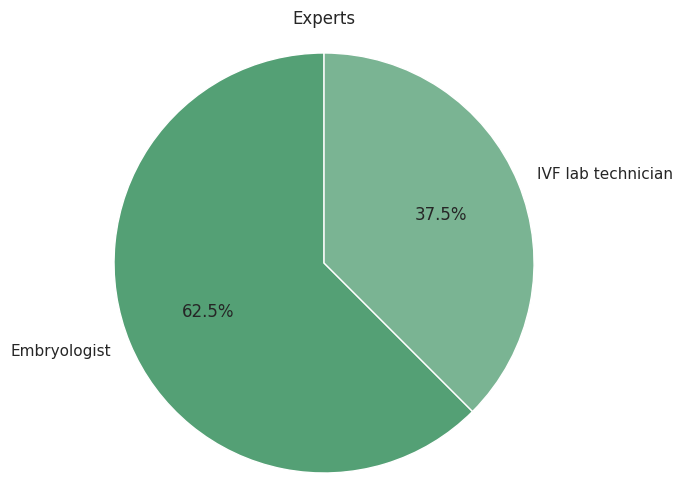

In [7]:

data = [25, 15]
categories = ['Embryologist', 'IVF lab technician']

max_index = data.index(max(data))
seagreen_palette = sns.light_palette("seagreen", n_colors=6)
custom_palette = seagreen_palette[3:5]

colors = [custom_palette[max_index]] + [color for i, color in enumerate(custom_palette) if i != max_index]
colors = [custom_palette[1], custom_palette[0]]

plt.figure(figsize=(8, 6))
plt.pie(data, labels=categories, autopct='%1.1f%%',
        colors=colors,
        startangle=90)

plt.axis('equal')
plt.title('Experts')
plt.show()


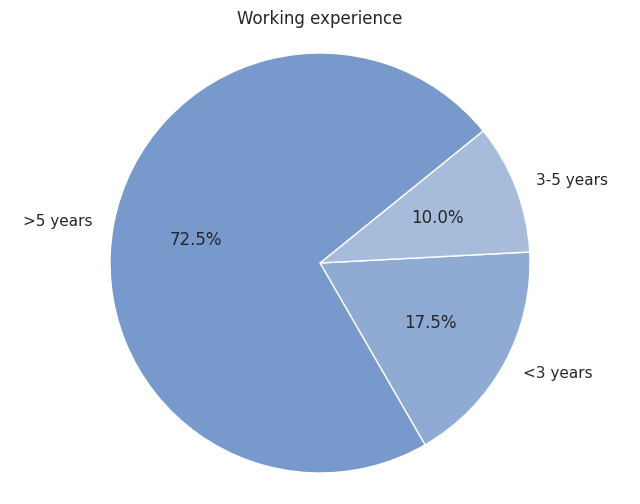

In [8]:
data = [7, 4, 29]
categories = ['<3 years', '3-5 years', '>5 years']
max_index = data.index(max(data))

seagreen_palette = sns.light_palette("#79C",n_colors=6)
custom_palette = seagreen_palette[3:6]

colors = [custom_palette[max_index]] + [color for i, color in enumerate(custom_palette) if i != max_index]
colors = [custom_palette[1], custom_palette[0], custom_palette[2]]

plt.figure(figsize=(8, 6))
plt.pie(data, labels=categories,
        autopct='%1.1f%%', colors=colors,
        startangle=-60)

plt.axis('equal')
plt.title('Working experience')
plt.show()
